In [137]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../")
from scripts.saliency.refine_saliency import *
from scripts.trimap import generate_trimap
import cv2 as cv
from skimage.segmentation import slic, mark_boundaries



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
img = cv.imread("../images/person.jpg")
saliency = cv.imread("../images/person_alpha.png") / 255

In [80]:
segments = slic(img, n_segments = 600, compactness=50)
medians = get_median_superpixel(saliency, segments)
sal, classes = classify_superpixels_based_on_median_of_saliency(saliency, segments, medians)
# descs = get_descriptor_for_each_superpixel(image, segments, sift, 40)
hists = get_color_hist_for_each_superpixel(img, segments)
dist = get_bhat_d_for_each_pair_superpixels_fast(hists)
fg, bg = get_indices_of_fg_bg_superpixels(classes)
dbscan = DBSCAN(eps=0.3,metric="precomputed",min_samples=2)
dbscan.fit_predict(dist[fg][:, fg])


array([-1, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0,  0,  0,
        0,  1,  1,  0, -1,  1,  1,  0,  1,  1,  1,  0,  2,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [56]:
dbscan.labels_

array([ 0,  1, -1,  1,  1,  0,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  3,
        1,  3,  3,  3,  3,  3,  3], dtype=int64)

In [48]:
new_fg, new_bg = clusterize_superpixels_hist(dist, classes, hists)

BGS
0.732668451889604 0.6233062328109882 36 36
0.7926327594297347 0.6745733329602062 52 51
0.7768109613677451 0.6520557033433051 78 75
0.7287691512070126 0.6181073184133918 334 310
0.7736687955203922 0.6422516043949253 338 314
0.7475150293411865 0.6180756688018865 352 328
0.6000885128490242 0.49024554705150736 364 340
0.7450521755728455 0.5821495718891688 367 343
0.6955305054862798 0.5791302795512712 368 344
0.8142240273159238 0.5766976578296551 370 346
0.8339479383361244 0.5555809247203717 377 353


In [50]:
segments

array([[  0,   0,   0, ...,  21,  21,  21],
       [  0,   0,   0, ...,  21,  21,  21],
       [  0,   0,   0, ...,  21,  21,  21],
       ...,
       [367, 367, 367, ..., 356, 356, 356],
       [367, 367, 367, ..., 356, 356, 356],
       [369, 369, 369, ..., 356, 356, 356]], dtype=int64)

In [35]:
fg

array([ 50,  62,  67,  79,  90,  93, 129, 133, 154, 155, 156, 158, 178,
       193, 195, 200, 219, 220, 228, 250, 254, 274, 288, 302], dtype=int64)

In [34]:
np.array(new_fg)

array([ 50,  62,  79,  90,  93, 129, 133, 154, 155, 156, 158, 178, 193,
       195, 200, 219, 220, 228, 250, 254, 274, 288, 302,  36,  52,  78,
       334, 338, 352, 364, 367, 368, 370, 377], dtype=int64)

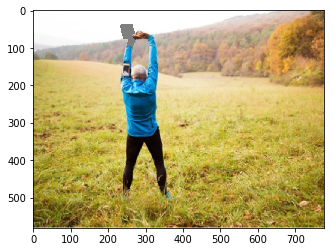

In [46]:
sal = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)/255
segment_indices = zip(*np.where(segments==40))
set_value_for_superpixel(sal, segment_indices, 0.5)
imshow(sal, cmap="gray")

In [61]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
dist

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.58080694e-01, 9.74669323e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.58080694e-01, 9.74669323e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.58080694e-01, 9.74669323e-01, 1.00000000e+00],
       ...,
       [9.58080694e-01, 9.58080694e-01, 9.58080694e-01, ...,
        7.68008876e-05, 2.18487594e-01, 8.39231004e-01],
       [9.74669323e-01, 9.74669323e-01, 9.74669323e-01, ...,
        2.18487594e-01, 0.00000000e+00, 8.11653860e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.39231004e-01, 8.11653860e-01, 6.99245559e-05]])

In [62]:
dist[bg][:, bg]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.58080694e-01, 9.74669323e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.58080694e-01, 9.74669323e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.58080694e-01, 9.74669323e-01, 1.00000000e+00],
       ...,
       [9.58080694e-01, 9.58080694e-01, 9.58080694e-01, ...,
        7.68008876e-05, 2.18487594e-01, 8.39231004e-01],
       [9.74669323e-01, 9.74669323e-01, 9.74669323e-01, ...,
        2.18487594e-01, 0.00000000e+00, 8.11653860e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.39231004e-01, 8.11653860e-01, 6.99245559e-05]])

In [101]:
dbscan = DBSCAN(eps=0.35,metric="precomputed",min_samples=2)

dbscan.fit_predict(dist[fg][:, fg])
dbscan.labels_

array([ 0,  1,  2,  2,  1,  2,  2, -1,  2,  0, -1, -1,  2,  0,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3], dtype=int64)

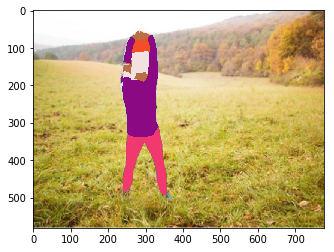

In [90]:
im = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)/255

color_clusters(im, segments, dbscan.labels_, fg)
imshow(im, cmap="gray")

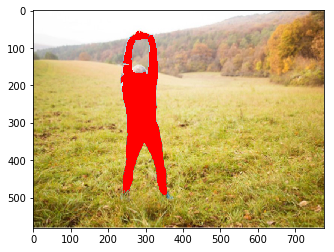

In [122]:
im = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)/255

just_color(im, segments, new_fg)
imshow(im, cmap="gray")

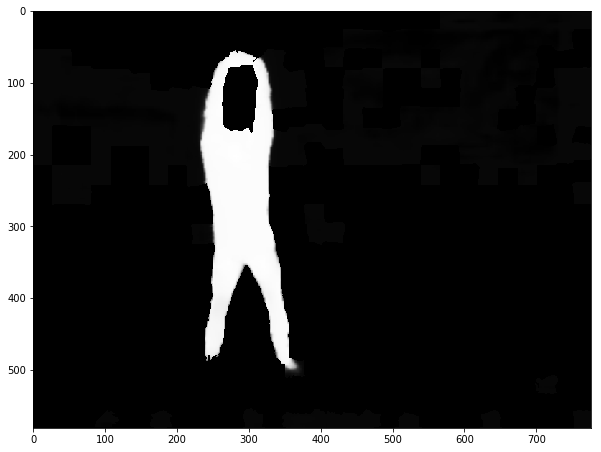

In [126]:
plt.figure(figsize=(10,10))

imshow(color_saliency(new_fg, new_bg, segments, saliency), cmap="gray")

In [133]:
(color_saliency(new_fg, new_bg, segments, saliency) * 255).astype(np.uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [8, 8, 8],
        [9, 9, 9],
        [9, 9, 9]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [8, 8, 8],
        [9, 9, 9],
        [9, 9, 9]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [8, 8, 8],
        [8, 8, 8],
        [8, 8, 8]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [7, 7, 7],
        [8, 8, 8],
        [8, 8, 8]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [8, 8, 8],
        [9, 9, 9],
        [9, 9, 9]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [8, 8, 8],
        [9, 9, 9],
        [9, 9, 9]]], dtype=uint8)

In [134]:
ret, otsu = cv.threshold((color_saliency(new_fg, new_bg, segments, saliency) * 255).astype(np.uint8)[:, :, 0],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

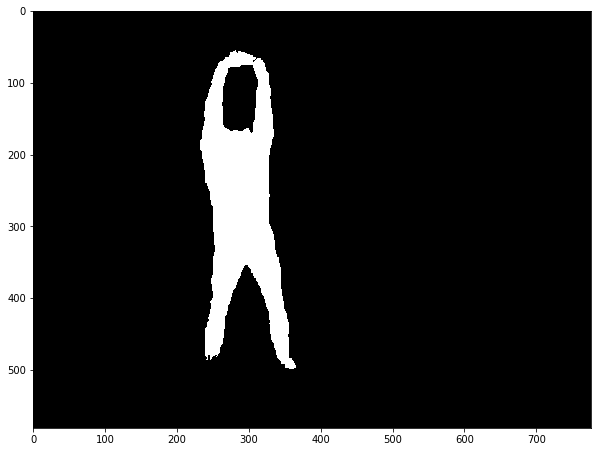

In [136]:
plt.figure(figsize=(10,10))

imshow(otsu, cmap="gray")

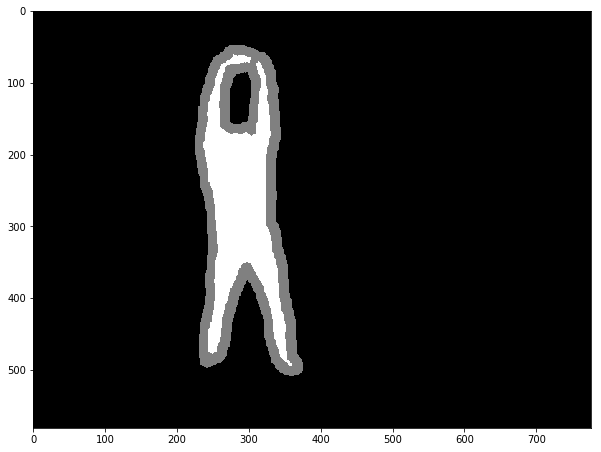

In [151]:
plt.figure(figsize=(10,10))

imshow(generate_trimap(otsu), cmap="gray")

In [121]:
new_fg, new_bg = clusterize_superpixels_hist(dist, classes, hists)

0.3175071974861951 0.6978023249107649 86 1
0.3767867201154548 0.7703870086991215 93 4
0.30564193075534646 0.743355627050993 140 7
0.42175592026446057 0.7133232313642704 171 10
BGS


In [92]:
new_fg

[87,
 88,
 118,
 150,
 185,
 203,
 210,
 211,
 233,
 234,
 259,
 261,
 289,
 291,
 317,
 318,
 322,
 326,
 347,
 348,
 349,
 375,
 376,
 377,
 379,
 404,
 406,
 419,
 420,
 436,
 437,
 470,
 478,
 495,
 505]

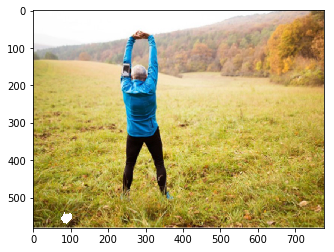

In [86]:
sal = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)/255
segment_indices = zip(*np.where(segments==607))
set_value_for_superpixel(sal, segment_indices, 1)
imshow(sal, cmap="gray")

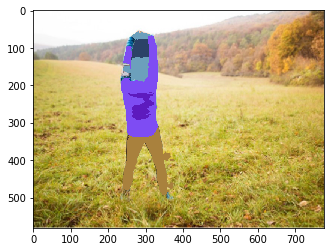

In [9]:
im = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)/255

color_clusters(im, segments, dbscan.labels_, new_fg)
imshow(im, cmap="gray")

In [44]:
for (i, segVal) in enumerate(np.unique(segments)):
    # construct a mask for the segment
    
    mask = np.zeros(img.shape[:2], dtype = "uint8")
    mask[segments == segVal] = 255
    print(i, segVal)
    # show the masked region
    cv.imshow("Applied", cv.bitwise_and(img, img, mask = mask))
    cv.waitKey(0)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42


KeyboardInterrupt: 

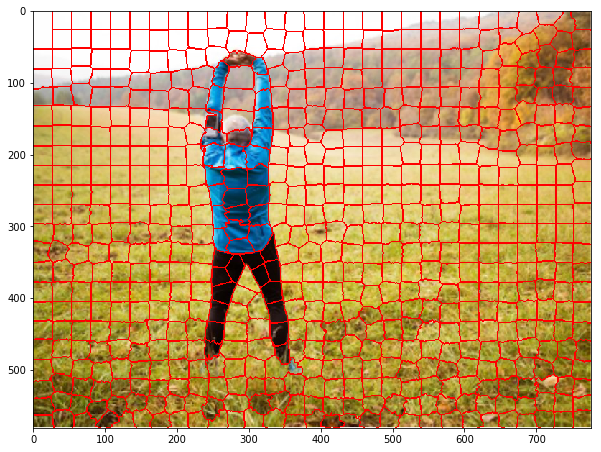

In [78]:
from matplotlib import pyplot as plt
im = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)/255
plt.figure(figsize=(10,10))
segments = slic(im, n_segments = 600, compactness=50)
imshow(mark_boundaries(im, segments, color=(1, 0, 0)))